### State
First, define the State of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [41]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_state:str

In [ ]:
# from typing_extensions import TypedDict

# class Movie(TypedDict):
#     title: str
#     director: str
#     year: int

# # Create an instance of the Movie TypedDict
# my_movie: Movie = {
#     "title": "The Shawshank Redemption",
#     "director": "Frank Darabont",
#     "year": 1994
# }

# # Accessing values
# print(f"Movie Title: {my_movie['title']}")
# print(f"Director: {my_movie['director']}")
# print(f"Year of Release: {my_movie['year']}")

Movie Title: The Shawshank Redemption
Director: Frank Darabont
Year of Release: 1994


#### Nodes
Nodes are just python functions.

The first positional argument is the state, as defined above.

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].

Each node returns a new value of the state key graph_state.

By default, the new value returned by each node will override the prior state value.

In [62]:
def first_node(state:State):
    print("My First Node is called")
    return {"graph_state":state["graph_state"]+"I am coding agent AI"}
def second_node(state:State):
    print("My Second Node is called")
    return {"graph_state":state["graph_state"]+"I am Flying drone with AI"}
def third_node(state:State):
    print("My Third Node is called")
    return {"graph_state":state["graph_state"]+"I am Sleeping "}

Example

Let's say the state dictionary that is passed into second_node looks like this:

state = {"graph_state": "Hello, world!"}

Use code with caution

Then, the expression {"graph_state": state['graph_state'] + " Cricket"} would evaluate to:

{"graph_state": "Hello, world! Cricket"}


Essentially, it's updating the 'graph_state' within the state dictionary by appending the text " Cricket" to it. This modified state is then passed on to the next stage in the workflow.

#### Edges
Edges connect the nodes.

Normal Edges are used if you want to always go from, for example, node_1 to node_2.

Conditional Edges are used if you want to optionally route between nodes.

Conditional edges are implemented as functions that return the next node to visit based upon some logic.

In [ ]:
import random 
from typing import Literal
def decide_Learning(state:State)->Literal["second_node","third_node"]:
    graph_state=state["graph_state"]
    if random.random()>0.5:
        return "second_node"
    return "third_node"

## Graph


#### Graph Construction
Now, we build the graph from our components defined above.

The StateGraph class is the graph class that we can use.

First, we initialize a StateGraph with the State class we defined above.

Then, we add our nodes and edges.

We use the START Node, a special node that sends user input to the graph, to indicate where to start our graph.

The END Node is a special node that represents a terminal node.

Finally, we compile our graph to perform a few basic checks on the graph structure.

We can visualize the graph as a Mermaid diagram.

In [66]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

#Build the graph
builder=StateGraph(State)
builder.add_node("first_node",first_node)
builder.add_node("second_node",second_node)
builder.add_node("third_node",third_node)

#Logic for edge

builder.add_edge(START,"first_node")
builder.add_conditional_edges("first_node",decide_Learning)
builder.add_edge("second_node",END)
builder.add_edge("third_node",END)

#ADD
graph=builder.compile()

#View graph
graph_image = Image(graph.get_graph().draw_mermaid_png())  # <-- Works
display(graph_image)

ReadTimeout: HTTPSConnectionPool(host='mermaid.ink', port=443): Read timed out. (read timeout=10)

In [65]:
graph.invoke({"graph_state":"My name is Rahul"})

My First Node is called
My Third Node is called


{'graph_state': 'My name is RahulI am coding agent AII am Sleeping '}

In [67]:
from IPython.display import Image
from typing_extensions import TypedDict
from langgraph.graph import StateGraph

class ClientContext(TypedDict):
    client_id: str

graph_builder = StateGraph(ClientContext)

def chatbot(state: ClientContext):
    return {"messages": "Hello agent"}

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()

graph_image = Image(graph.get_graph().draw_mermaid_png())  


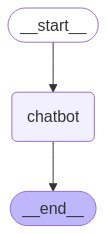

In [68]:
display(graph_image)

### Graph Invocation
The compiled graph implements the runnable protocol.

This provides a standard way to execute LangChain components.

invoke is one of the standard methods in this interface.

The input is a dictionary {"graph_state": "Hi, this is lance."}, which sets the initial value for our graph state dict.

When invoke is called, the graph starts execution from the START node.

It progresses through the defined nodes (node_1, node_2, node_3) in order.

The conditional edge will traverse from node 1 to node 2 or 3 using a 50/50 decision rule.

Each node function receives the current state and returns a new value, which overrides the graph state.

The execution continues until it reaches the END node.

In [ ]:
graph.invoke({"graph_state":"My name is Rahul"})

My First Node is called
My Second Node is called


{'graph_state': 'Hi,My name is Krish,I am playing Cricket'}

### Basic Chatbot

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001D96E029D90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001D96E02AF00>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

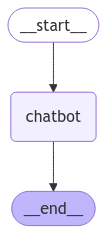

Assistant: Hi! 👋 

How can I help you today? 😊

Assistant: Generative AI is a fascinating field of artificial intelligence focused on creating new content. 

Think of it like this: instead of simply processing and understanding existing data, generative AI learns the underlying patterns and structures within that data and uses that knowledge to generate something entirely new. 

Here's a breakdown:

**What it does:**

* **Creates text:** Write stories, poems, articles, dialogue, even code!
* **Generates images:** Produce realistic photos, artwork, illustrations, and designs.
* **Composes music:**  Craft melodies, harmonies, and entire musical pieces.
* **Synthesizes audio:**  Generate realistic speech, sound effects, and voiceovers.
* **Builds 3D models:** Design objects and environments in virtual space.

**How it works:**

Generative AI models are typically trained on massive datasets of existing content. This allows them to learn the statistical relationships between different eleme